### Example of LSTM and GRU - IMDB dataset

Loading and pre-processing dataset

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Dense, Embedding


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)
input_train = sequence.pad_sequences(x_train, maxlen=500)
input_test = sequence.pad_sequences(x_test, maxlen=500)

Defining and training the LSTM model

In [6]:
model = models.Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

history_dict = history.history

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 174ms/step - acc: 0.5831 - loss: 0.6646 - val_acc: 0.7998 - val_loss: 0.4495
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - acc: 0.8183 - loss: 0.4161 - val_acc: 0.8512 - val_loss: 0.3566
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - acc: 0.8639 - loss: 0.3309 - val_acc: 0.8556 - val_loss: 0.3392
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - acc: 0.8832 - loss: 0.2977 - val_acc: 0.8696 - val_loss: 0.3093
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - acc: 0.8877 - loss: 0.2843 - val_acc: 0.8806 - val_loss: 0.2946
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - acc: 0.9011 - loss: 0.2542 - val_acc: 0.8842 - val_loss: 0.2923
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1176s 8s/step - acc: 0.9096 - loss: 0.2382 - val_acc: 0.8756 - val_loss: 0.3082
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 596s 4s/step - acc: 0.9202 - loss: 0.2153 - val_acc: 0.8326 - val_loss: 0.3709
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━

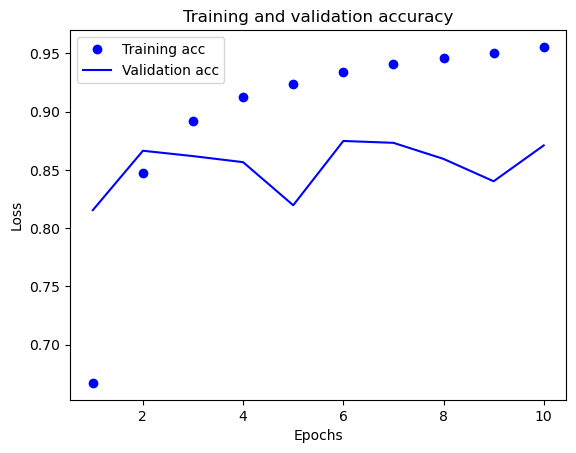

[0.34684064984321594, 0.8632000088691711]


In [4]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model.evaluate(input_test, y_test, verbose = 0)
print(results)

Defining and training an LSTM with two layers

In [5]:
model2 = models.Sequential()
model2.add(Embedding(10000, 32))
model2.add(LSTM(32, return_sequences = True))
model2.add(LSTM(32))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model2.summary()

history2 = model2.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

history_dict2 = history2.history

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 55s 330ms/step - loss: 0.5905 - acc: 0.6538 - val_loss: 0.4335 - val_acc: 0.8056
Epoch 2/10
157/

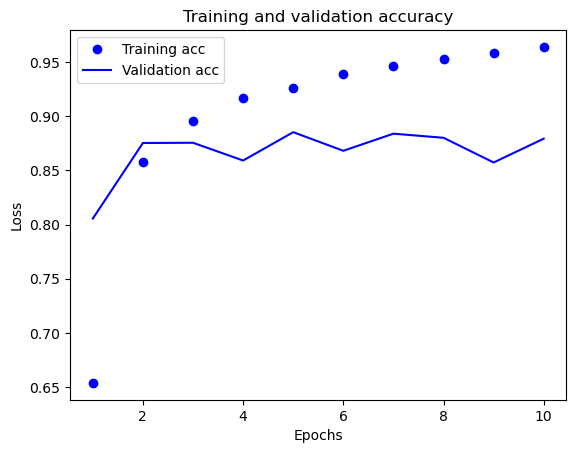

[0.4586437940597534, 0.8660399913787842]


In [6]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict2['acc'] 
val_acc_values = history_dict2['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model2.evaluate(input_test, y_test, verbose = 0)
print(results)

Defining and training a GRU model

In [7]:
from tensorflow.keras.layers import GRU
model3 = models.Sequential()
model3.add(Embedding(10000, 32))
model3.add(GRU(32))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model3.summary()

history3 = model3.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

history_dict3 = history3.history

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 16s 96ms/step - loss: 0.6442 - acc: 0.6098 - val_loss: 0.5468 - val_acc: 0.7584
Epoch 2/10
157/157 [==============================] - 15s 97ms/step - loss: 0.3806 - acc: 0.8344 - val_loss: 0.4253 - val_acc: 0.7988
Epoch 3/10
157

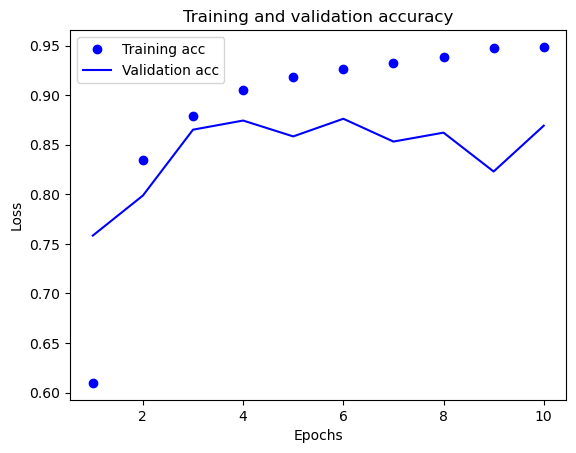

[0.3659030497074127, 0.8626000285148621]


In [8]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict3['acc'] 
val_acc_values = history_dict3['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model3.evaluate(input_test, y_test, verbose = 0)
print(results)

LSTM with Dropout

In [9]:
from tensorflow.keras.layers import Dropout
model4 = models.Sequential()
model4.add(Embedding(10000, 32))
model4.add(LSTM(32, return_sequences = True))
model4.add(Dropout(0.2))
model4.add(LSTM(32))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model4.summary()

history4 = model4.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

history_dict4 = history4.history

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_3 (LSTM)               (None, None, 32)          8320      
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 33667

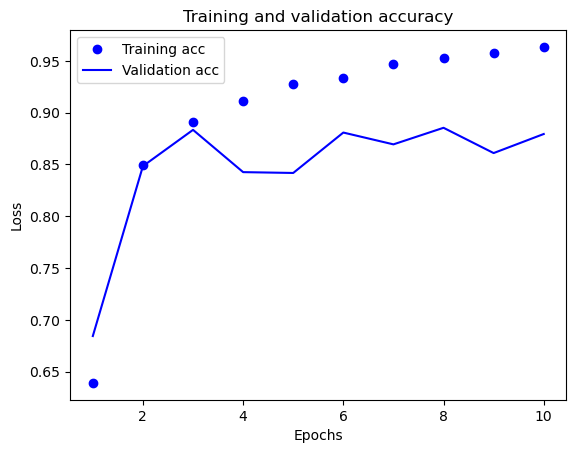

[0.4266906678676605, 0.8677999973297119]


In [10]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict4['acc'] 
val_acc_values = history_dict4['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model4.evaluate(input_test, y_test, verbose = 0)
print(results)